# Part 2.1_Exploratory Data Analysis (EDA)
---
Part I of EDA will be conducted for the dataset. In this notebook we will:
- Encode the ordinal features
- Examine the Pearson Correlation of the ordinal,continuous and discrete features with the Target features (`SalePrice`)


EDA of the nominal features will be conducted in Part 2.2.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")


# load csv 


pd.options.display.max_columns = 100

df = pd.read_csv("df_clean.csv")
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,none,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,none,none,none,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,none,none,none,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,none,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,none,none,none,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,none,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,none,none,none,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,none,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,none,none,none,0,3,2010,WD,138500


In [2]:
# Referenced from Part I

ordinal = ["Lot Shape", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", 
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC", 
    "Central Air", "Kitchen Qual", "Functional", "Fireplace Qu", "Garage Finish", "Garage Qual", 
    "Garage Cond", "Paved Drive", "Pool QC", "Fence"]

discrete = ["Year Built", "Year Remod/Add", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath",
    "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Yr Blt", "Garage Cars", "Mo Sold", "Yr Sold"]

continuous = ["Lot Area", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", 
    "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", 
    "Garage Area", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch", "Pool Area",
    "Misc Val"]

nominal = ["MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Utilities", "Lot Config", "Neighborhood", "Condition 1", "Condition 2", 
    "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", 
    "Foundation", "Heating", "Electrical", "Garage Type", "Misc Feature", "Sale Type"]

## Encoding and Extracting Ordinal Features 


Referencing the data dictionary, we will manually encode the ordinal features and save the resulting dataset.

In [3]:
lot_shape_encode = {"IR3":0, "IR2":1, "IR1":2, "Reg":3}
land_slope_encode = {"Gtl":0, "Mod":1, "Sev":2}
exter_qual_encode = {"Po":0, "Fa":1, "TA":1, "Gd":2, "Ex":3}
exter_cond_encode = {"Po":0, "Fa":1, "TA":1, "Gd":2, "Ex":3}
bsmt_qual_encode = {"none":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
bsmt_cond_encode = {"none":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
bsmt_exposure_encode = {"none":0, "No":1, "Mn":2, "Av":3, "Gd": 4}
bsmtfin_type1_encode = {"none":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
bsmtfin_type2_encode = {"none":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
heating_qc_encode = {"Po":0, "Fa":1, "TA":1, "Gd":2, "Ex":3}
central_air_encode = {"N":0, "Y":1}
kitchen_qual_encode = {"Po":0, "Fa":1, "TA":1, "Gd":2, "Ex":3}
functional_encode = {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7}
fireplace_qu_encode = {"none":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
garage_finish_encode = {"none":0, "Unf":1, "RFn":2, "Fin":3}
garage_qual_encode = {"none":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
garage_cond_encode = {"none":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
paved_drive_encode = {"N":0, "P":1, "Y":2}
pool_qc_encode = {"none":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
fence_encode = {"none":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}

df["Lot Shape"] = df["Lot Shape"].map(lot_shape_encode)
df["Land Slope"] = df["Land Slope"].map(land_slope_encode)
df["Exter Qual"] = df["Exter Qual"].map(exter_qual_encode)
df["Exter Cond"] = df["Exter Cond"].map(exter_cond_encode)
df["Bsmt Qual"] = df["Bsmt Qual"].map(bsmt_qual_encode)
df["Bsmt Cond"] = df["Bsmt Cond"].map(bsmt_cond_encode)
df["Bsmt Exposure"] = df["Bsmt Exposure"].map(bsmt_exposure_encode)
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].map(bsmtfin_type1_encode)
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].map(bsmtfin_type2_encode)
df["Heating QC"] = df["Heating QC"].map(heating_qc_encode)
df["Central Air"] = df["Central Air"].map(central_air_encode)
df["Kitchen Qual"] = df["Kitchen Qual"].map(kitchen_qual_encode)
df["Functional"] = df["Functional"].map(functional_encode)
df["Fireplace Qu"] = df["Fireplace Qu"].map(fireplace_qu_encode)
df["Garage Finish"] = df["Garage Finish"].map(garage_finish_encode)
df["Garage Qual"] = df["Garage Qual"].map(garage_qual_encode)
df["Garage Cond"] = df["Garage Cond"].map(garage_cond_encode)
df["Paved Drive"] = df["Paved Drive"].map(paved_drive_encode)
df["Pool QC"] = df["Pool QC"].map(pool_qc_encode)
df["Fence"] = df["Fence"].map(fence_encode)

for col in ordinal: # check to ensure all values were encoded correctly
    is_numeric = (df[col].dtype != "O")
    assert (is_numeric)

## Examine the Distributions of the Numerical Features


Numerical features (features which consist of a collection of integers/floats) will be consolidated and their distributions examined. 


We observe that most of the features have a skewed distribution, we will apply the Log1p transform to those features which exhibit an absolute skew of > 0.5. This is so that the distribution of the feature can more closely resemble a normal distribution.


The skewed features are identified and applied the Log1p transformation.


*We do not use the natural log transformation as there are zero values in the features, which is undefined.*

,Lot Shape,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,2,0,6,8,2,1,3,3,1,6,1,3,1,2,7,0,2,3,3,2,0,0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010,13517,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,0,0,0,0,130500
1,2,0,7,5,2,1,4,3,1,6,1,3,1,2,7,3,2,3,3,2,0,0,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009,11492,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,0,0,0,0,220000
2,3,0,5,7,1,2,3,3,1,6,1,1,1,2,7,0,1,3,3,2,0,0,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,0,0,0,0,109000
3,3,0,5,5,1,1,4,3,1,1,1,2,1,1,7,0,3,3,3,2,0,0,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010,9802,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,0,0,0,0,174000
4,2,0,6,8,1,1,2,4,1,1,1,1,1,1,7,0,1,3,3,0,0,0,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010,14235,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,0,0,0,0,138500


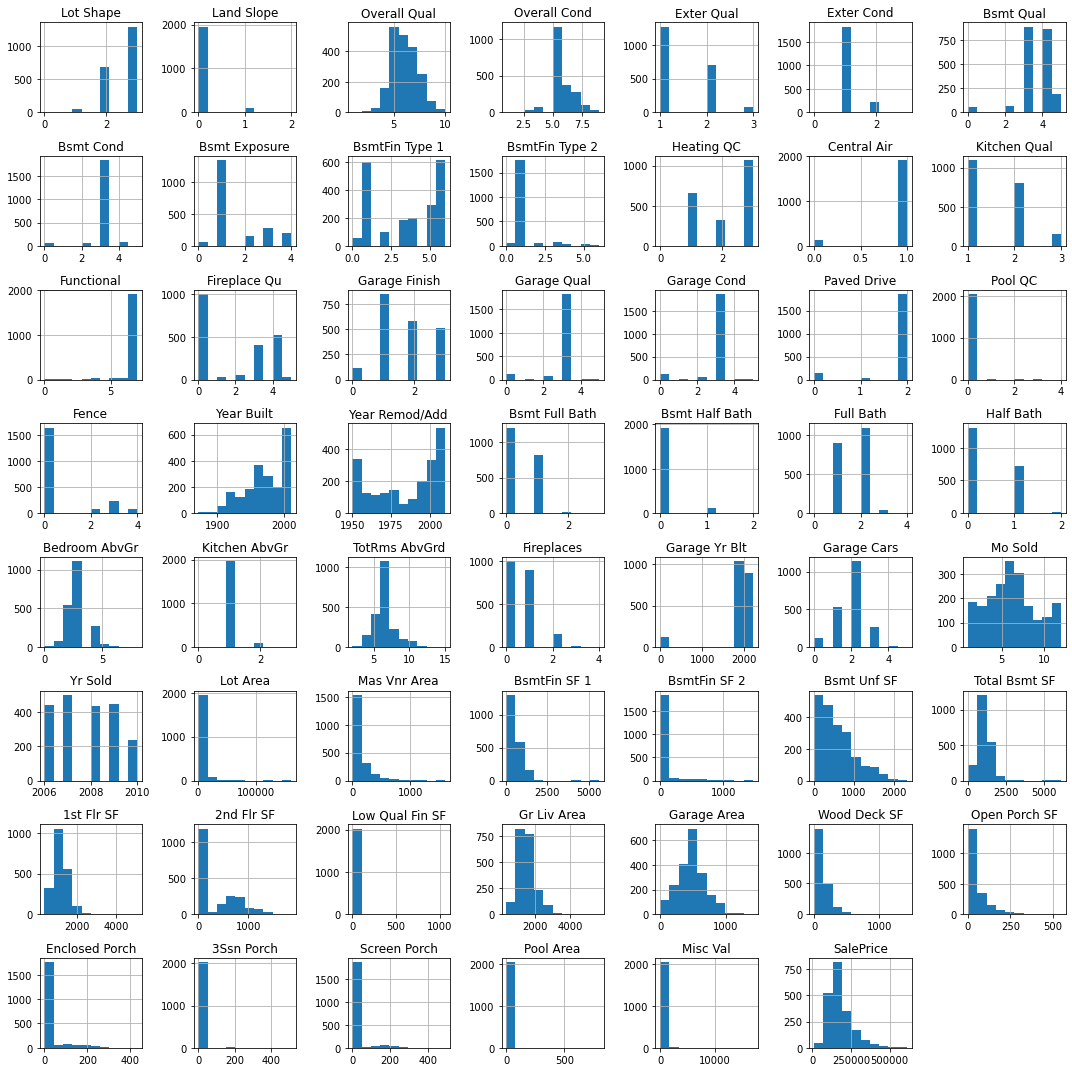

In [4]:
numeric = ordinal + discrete + continuous + ["SalePrice"]
df_numeric = df[numeric]

display(df_numeric.head())
df_numeric.hist(figsize=(15,15))
plt.tight_layout()

In [5]:
skews = df_numeric.apply(stats.skew)

# creating a new dataframe to determine features that are skewed
df_skews=pd.DataFrame(skews)
df_skews.rename(columns={0:"skewness"}, inplace=True)
df_skews["abs_skewness"] = df_skews["skewness"].apply(abs)
df_skews["skew"] = df_skews["skewness"].apply(lambda x: True if abs(x) >= 0.5 else False)

# applying log transform to the skewed features in main dataframe df
for idx in df_skews.index:
    if (df_skews.loc[idx, "skew"] == True) and idx not in ["Year Built", "Year Remodd/Add", "Mo Sold", "Yr Sold"]:
        df[idx] = df[idx].map(np.log1p)

skewed_columns = list(df_skews[df_skews["skew"]==True].index)
display(skewed_columns)

%store skewed_columns # for later use in next notebooks

['Lot Shape',
 'Land Slope',
 'Overall Cond',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Central Air',
 'Kitchen Qual',
 'Functional',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Year Built',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Half Bath',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice']

Stored 'skewed_columns' (list)


#### After Applying Log1p 

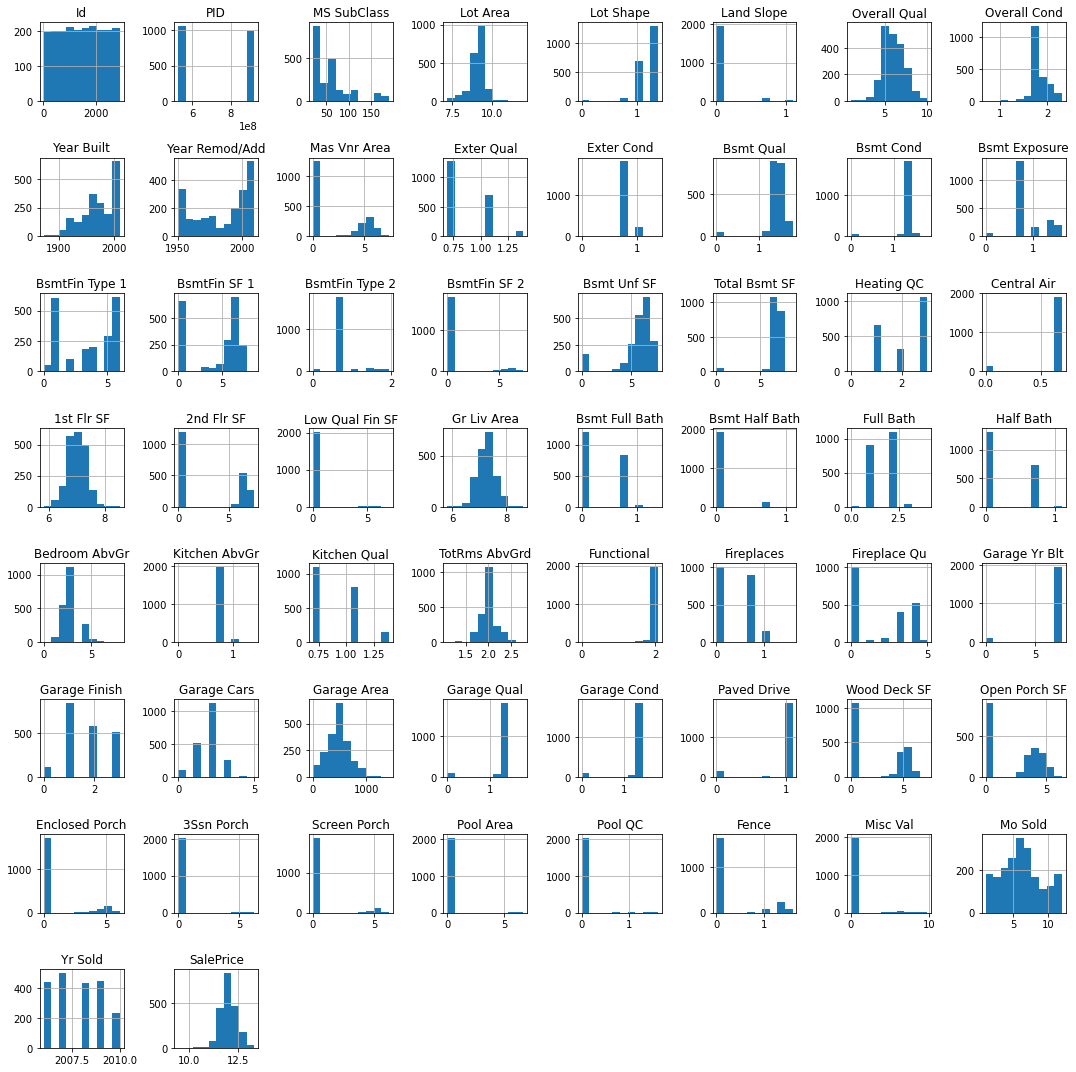

In [6]:
df.hist(figsize=(15,15))
plt.tight_layout()

In [7]:
df.to_csv("df_clean_ordinal_encoded.csv", index_label=False) # save the DataFrame 

## Correlation Analysis
---


We will examine the Pearson Correlation to see if we can derive any insight on which feature/ what kinds of features have a correlation to the target feature.


We will use a threshold of **0.3** to explore the correlations with the target feature `SalePrice` and define the columns to obtain the correlations.

In [8]:
threshold =0.3
ordinal = ordinal + ["SalePrice"]
discrete = discrete + ["SalePrice"]
continuous = continuous + ["SalePrice"]

### Reusable Function

In [9]:
def draw_heatmap(cols,target="SalePrice"):
    
    correlation = df[cols].corr() 
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    mask = np.triu(correlation)
    plt.figure(figsize=(20,10))
    sns.heatmap(correlation, linewidths=0.5, annot=True, cmap = cmap, mask=mask, center=0)

## Extracting Correlated Ordinal Features with Target Feature

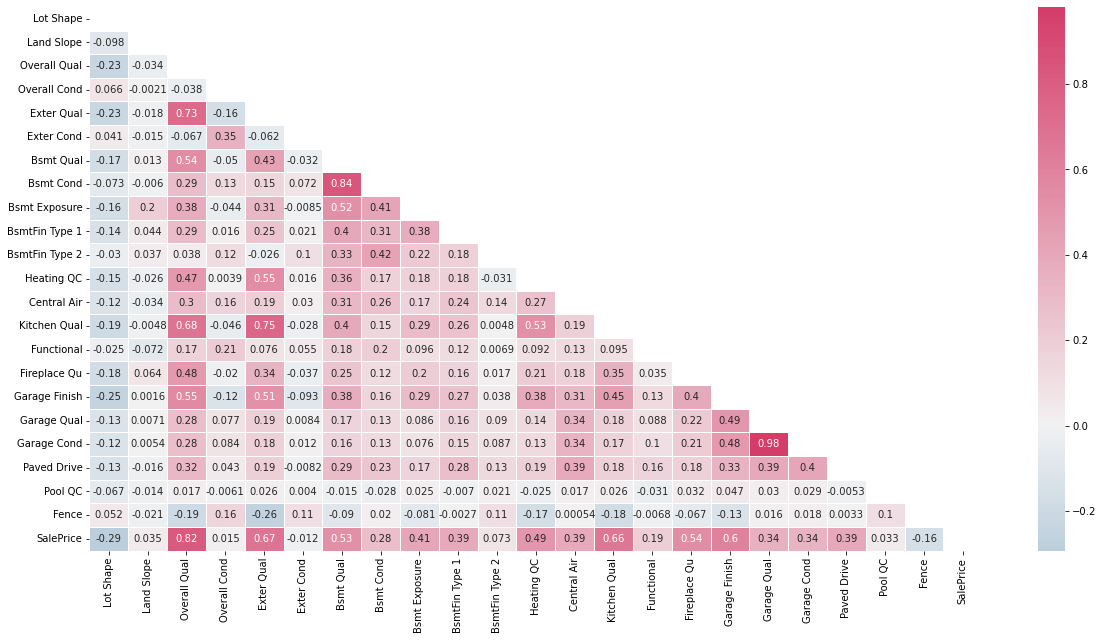

In [10]:
draw_heatmap(ordinal)

In [11]:
analysis_corr = list() # to collect features with > 0.3 r-score
low_corr = list() # to collect features with < 0.1 r-score

for col in list(df[ordinal].corr().columns):
    if (abs(df[ordinal].corr().loc[col, "SalePrice"]) >= threshold) and (df[ordinal].corr().loc[col,"SalePrice"] != 1):
        analysis_corr.append((col, round(df[ordinal].corr().loc[col,"SalePrice"],3)))
    elif (abs(df[ordinal].corr().loc[col, "SalePrice"]) < 0.1) and (df[ordinal].corr().loc[col,"SalePrice"] != 1):
        low_corr.append((col, round(df[ordinal].corr().loc[col,"SalePrice"],3)))

## Extracting Correlated Discrete Features with Target Feature

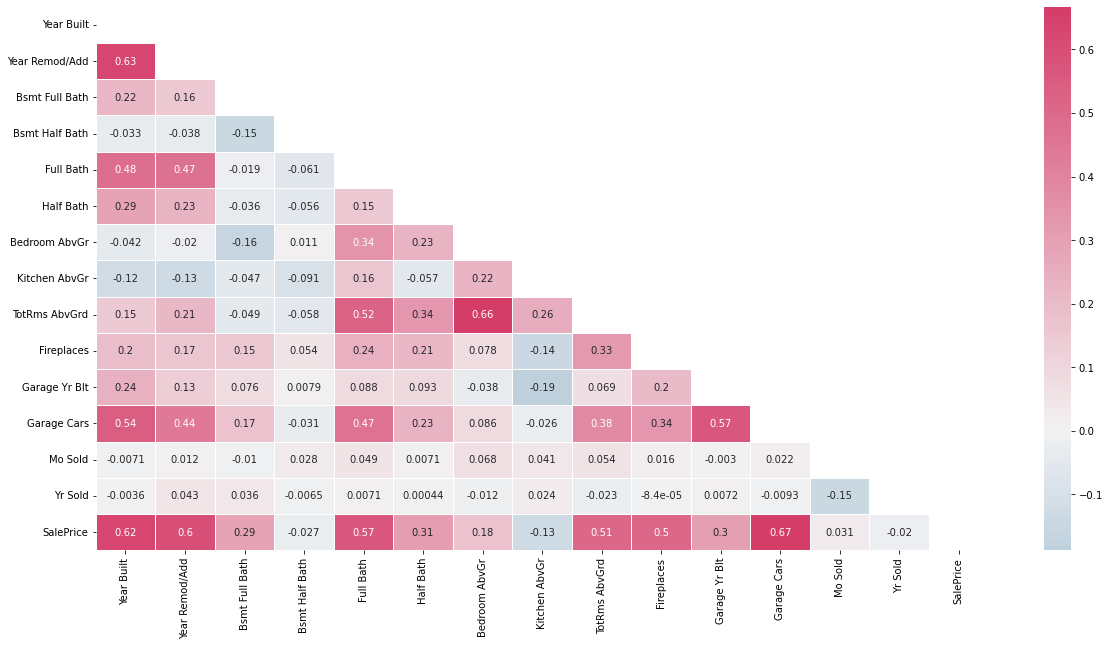

In [12]:
draw_heatmap(discrete)

In [13]:
for col in list(df[discrete].corr().columns):
    if (abs(df[discrete].corr().loc[col, "SalePrice"]) >= threshold) and (df[discrete].corr().loc[col,"SalePrice"] != 1):
        analysis_corr.append((col, round(df[discrete].corr().loc[col,"SalePrice"],3)))
    elif (abs(df[discrete].corr().loc[col, "SalePrice"]) < 0.1) and (df[discrete].corr().loc[col,"SalePrice"] != 1):
        low_corr.append((col, round(df[discrete].corr().loc[col,"SalePrice"],3)))

## Extracting Correlated Continuous Features with Target Feature

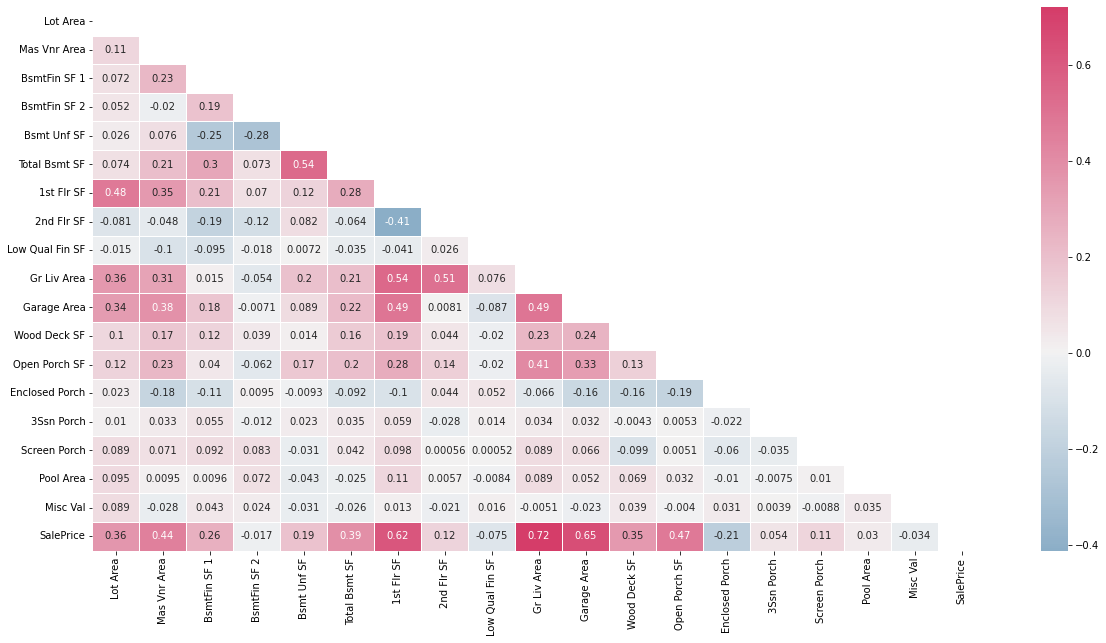

In [14]:
draw_heatmap(continuous)

In [15]:
for col in list(df[continuous].corr().columns):
    if (abs(df[continuous].corr().loc[col, "SalePrice"]) >= threshold) and (df[continuous].corr().loc[col,"SalePrice"] != 1):
        analysis_corr.append((col, round(df[continuous].corr().loc[col,"SalePrice"],3)))
    elif (abs(df[continuous].corr().loc[col, "SalePrice"]) < 0.1) and (df[continuous].corr().loc[col,"SalePrice"] != 1):
        low_corr.append((col, round(df[continuous].corr().loc[col,"SalePrice"],3)))

## Analysis


### Pairwise Correlation with Target Feature

Consolidating the features which have correlation of above 0.3 into the DataFrame `df_corr`, the following can be observed:


- The overall quality of the property is strongly correlated to SalePrice. This is reasonable given that the better quality properties tend to be more valuable, as `Overall Qual` has the largest correlation score.


- The above ground living area of the property is strongly correlated to SalePrice. This is reasonable given that a larger property would tend to be more valuable, as `Gr Liv Area` has the 3rd largest correlation score at about 0.7.


- The later the year a property is built/remodded is strongly correlated to the SalePrice. This is reasonable as newer properties tend to be more expensive due to inflation and are likely of better condition.


- There is almost zero correlation between `Yr Sold` and `Mo Sold` with SalePrice, this suggests that timing the market to maximise property value does not yield higher prices.


- The size of a property's garage is more strongly correlated to SalePrice than the qualitative measures of a garage (quality, completed/not completed, finish & condition) as seen from the larger correlation scores of `Garage Cars` and `Garage Area` compared to the rest of the garage features.


- The quality of a property's basement is more strongly correlated to SalePrice than the size of the basement, as seen from the larger correlation scores of `Bsmt Qual` compared to `Total Bsmt SF`



- The overall and external quality of a property is more strongly correlated to SalePrice than the overall and external condition of the property, as seen from the much larger correlation scores of `Overall Qual` and `Exter Qual` over `Overall Cond` and `Exter Cond`



In [16]:
corr_dict = {p[0]:p[1] for p in analysis_corr}

df_corr = pd.DataFrame.from_dict(corr_dict, orient="index")
df_corr.rename(columns={0:"Correlation with SalePrice"}, inplace=True)

display(df_corr["Correlation with SalePrice"].sort_values(ascending=False))

Overall Qual      0.823
Gr Liv Area       0.721
Exter Qual        0.672
Garage Cars       0.667
Kitchen Qual      0.664
Garage Area       0.650
Year Built        0.624
1st Flr SF        0.616
Year Remod/Add    0.599
Garage Finish     0.598
Full Bath         0.566
Fireplace Qu      0.542
Bsmt Qual         0.525
TotRms AbvGrd     0.507
Fireplaces        0.505
Heating QC        0.493
Open Porch SF     0.475
Mas Vnr Area      0.445
Bsmt Exposure     0.412
Paved Drive       0.392
Total Bsmt SF     0.391
Central Air       0.387
BsmtFin Type 1    0.386
Lot Area          0.361
Wood Deck SF      0.350
Garage Qual       0.345
Garage Cond       0.339
Half Bath         0.307
Garage Yr Blt     0.304
Name: Correlation with SalePrice, dtype: float64

In [17]:
low_corr_dict = {p[0]:p[1] for p in low_corr}

df_low_corr = pd.DataFrame.from_dict(low_corr_dict, orient="index")
df_low_corr.rename(columns={0:"Correlation with SalePrice"}, inplace=True)

display(df_low_corr["Correlation with SalePrice"].sort_values(ascending=False))

BsmtFin Type 2     0.073
3Ssn Porch         0.054
Land Slope         0.035
Pool QC            0.033
Mo Sold            0.031
Pool Area          0.030
Overall Cond       0.015
Exter Cond        -0.012
BsmtFin SF 2      -0.017
Yr Sold           -0.020
Bsmt Half Bath    -0.027
Misc Val          -0.034
Low Qual Fin SF   -0.075
Name: Correlation with SalePrice, dtype: float64